# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
print(X.shape)

(100, 5)


## Visualize Dataset
This is the same code from Assignment 1

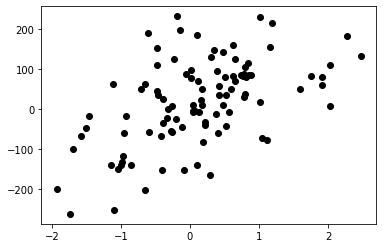

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], y, c ='black')
# Your code here

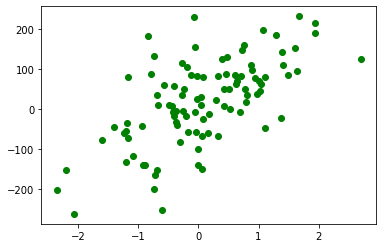

In [ ]:
plt.scatter(X[:,1], y, c ='green')

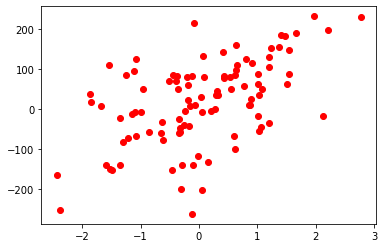

In [ ]:
plt.scatter(X[:,2], y, c ='red')

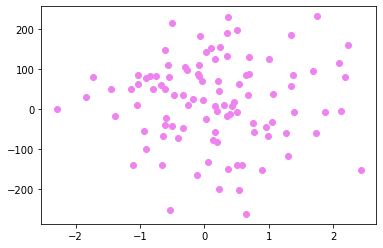

In [ ]:
plt.scatter(X[:,3], y, c ='violet')

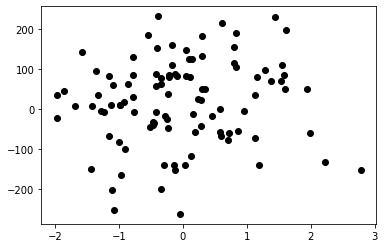

In [ ]:
plt.scatter(X[:,4], y, c ='black')

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))#Adding regularization
model.add(Dense(5, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))#Adding regularization
model.add(Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))

model.summary()

learning_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 1e-3,
    decay_steps=1000,
    decay_rate=0.9)
optim = keras.optimizers.SGD(learning_rate=learning_schedule)
model.compile(loss='mse',optimizer=optim, metrics=['mse'])
print(model.layers)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),shuffle=True)
loss,mse = model.evaluate(X_test, y_test, verbose=1)
print('MSE: %.3f' % mse)
# Your code here

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 5)                 30        
                                                                 
 dense_37 (Dense)            (None, 5)                 30        
                                                                 
 dense_38 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
[<keras.layers.core.dense.Dense object at 0x7f82b902c310>, <keras.layers.core.dense.Dense object at 0x7f82b9399150>, <keras.layers.core.dense.Dense object at 0x7f82b49a9c90>]
Epoch 1/100
2/2 [==============================] - 1s 196ms/step - loss: 11442.6602 - mse: 11440.4521 - val_loss: 11834.9062 - val_mse: 11832.7129

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

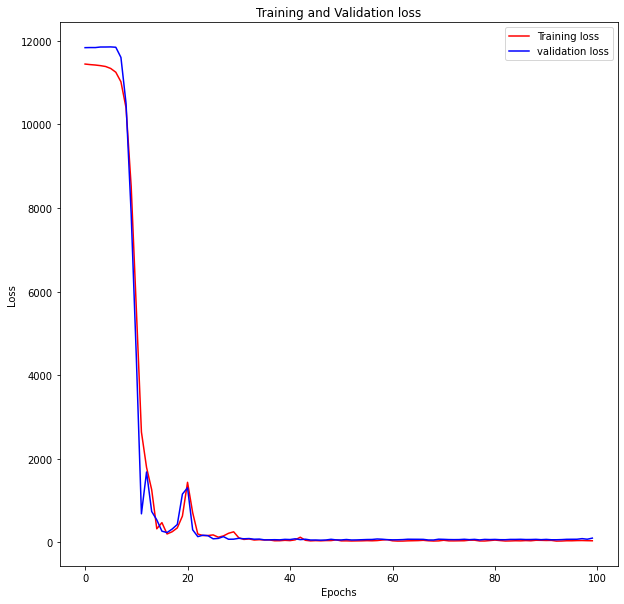

In [ ]:
# Your code here
plt.figure(figsize=(10,10))
loss_train = history.history['loss'] # training loss
loss_val = history.history['val_loss'] # validation loss
epochs = range(0,100) # since epochs=100

#Plotting training loss  and validation against epochs
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [ ]:
# Insert the function for R2 Score
y_pred = model.predict(X_test)
import numpy as np
def mean_squared_error(y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))

from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test, y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 19712.02722145461
Accuracy: 0.9933118824242653


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

#CUSTOM MODEL

Model Definition: 
*  Input of shape 5 
*  Dense of shape 5 
*  Dense of shape 7
*  Dense of shape 9
*  Dense of shape 10
*  Dense of shape 11



In [162]:
from tensorflow.keras import layers
Model  = keras.Sequential([
                           layers.Dense(5, activation="relu", name = "layer1", input_shape=(5,)),
                           layers.Dense(7, activation="relu", name = "layer2"),
                           layers.Dense(9, activation="relu", name = "layer3"),
                           layers.Dense(10, activation="relu", name = "layer4"),
                           layers.Dense(11, activation="relu", name = "layer5")
])
Model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 30        
                                                                 
 layer2 (Dense)              (None, 7)                 42        
                                                                 
 layer3 (Dense)              (None, 9)                 72        
                                                                 
 layer4 (Dense)              (None, 10)                100       
                                                                 
 layer5 (Dense)              (None, 11)                121       
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


Optimizer used **Adam** and **Mean Squared Error** loss

In [163]:
opt = keras.optimizers.Adam(learning_rate=0.01)
Model.compile(loss='mse', optimizer=opt, metrics=['mse'])

#MODEL FITTING

In [164]:
history = Model.fit(X_train, y_train, epochs=110, validation_data=(X_val, y_val))

Epoch 1/110
2/2 [==============================] - 1s 172ms/step - loss: 11429.8389 - mse: 11429.8389 - val_loss: 11817.8770 - val_mse: 11817.8770
Epoch 2/110
2/2 [==============================] - 0s 27ms/step - loss: 11428.3945 - mse: 11428.3945 - val_loss: 11813.4512 - val_mse: 11813.4512
Epoch 3/110
2/2 [==============================] - 0s 26ms/step - loss: 11425.0830 - mse: 11425.0830 - val_loss: 11807.1797 - val_mse: 11807.1797
Epoch 4/110
2/2 [==============================] - 0s 25ms/step - loss: 11420.6426 - mse: 11420.6426 - val_loss: 11797.4785 - val_mse: 11797.4785
Epoch 5/110
2/2 [==============================] - 0s 25ms/step - loss: 11413.3506 - mse: 11413.3506 - val_loss: 11781.8545 - val_mse: 11781.8545
Epoch 6/110
2/2 [==============================] - 0s 24ms/step - loss: 11403.8467 - mse: 11403.8467 - val_loss: 11760.3018 - val_mse: 11760.3018
Epoch 7/110
2/2 [==============================] - 0s 27ms/step - loss: 11388.7871 - mse: 11388.7871 - val_loss: 11733.5645

Calculating Mean squared error and loss

In [165]:
loss,mse = Model.evaluate(X_test, y_test)
print('MSE: %.3f' % mse)

1/1 [==============================] - 0s 23ms/step - loss: 5586.5889 - mse: 5586.5889
MSE: 5586.589


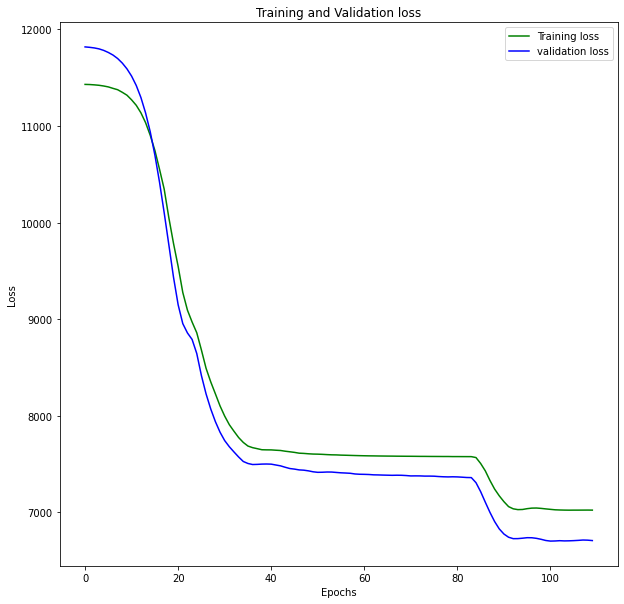

In [166]:
y_pred = Model.predict(X_test)
plt.figure(figsize=(10,10))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,110)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()